In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import seaborn as sns
# from notebooks.User_Engagement_Analysis.ipynb import user_metrics


In [25]:
# Load dataset
df = pd.read_csv(r'..\data\Week1_challenge_data_source(CSV).csv')


# Assign Engagement and Experience Scores
We will compute the engagement score and experience score using the Euclidean distance between each user and the less engaged/worst experience cluster (from the k-means clustering results):

In [26]:
# Compute the average throughput (Download + Upload)
df['Avg_Throughput'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2

# Compute the average TCP retransmission (Download + Upload)
df['Avg_TCP_Retrans'] = (df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']) / 2

# Grouping by 'Handset Type' to analyze average throughput and TCP retransmission
throughput_by_handset = df.groupby('Handset Type')['Avg_Throughput'].mean()
tcp_retrans_by_handset = df.groupby('Handset Type')['Avg_TCP_Retrans'].mean()

# Display results
print(throughput_by_handset)
print(tcp_retrans_by_handset)

Handset Type
A-Link Telecom I. Cubot A5                                                             11755.000000
A-Link Telecom I. Cubot Note Plus                                                       3349.500000
A-Link Telecom I. Cubot Note S                                                          4468.500000
A-Link Telecom I. Cubot Nova                                                           28108.500000
A-Link Telecom I. Cubot Power                                                          34734.000000
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       29.000000
Zyxel Communicat. Lte7460                                                              30978.000000
Zyxel Communicat. Sbg3600                                                              48675.500000
Zyxel Communicat. Zyxel Wah7706                                                        

In [27]:
# Top 10 Handset Types by Average Throughput
top_10_throughput = throughput_by_handset.nlargest(10)

# Top 10 Handset Types by Average TCP Retransmission
top_10_tcp_retrans = tcp_retrans_by_handset.nlargest(10)

# Display top handsets
print("Top 10 Handset Types by Throughput:")
print(top_10_throughput)

print("Top 10 Handset Types by TCP Retransmission:")
print(top_10_tcp_retrans)

Top 10 Handset Types by Throughput:
Handset Type
Huawei B715S-23C               54497.115385
New-Bund Technol. Mix 2        52605.500000
Lg G6+                         50067.500000
Zyxel Communicat. Sbg3600      48675.500000
Huawei Y9 2019                 45869.500000
Xiaomi Communica. M1902F1G     42806.833333
Spa Condor Elect. Allure M2    42155.750000
Ovvi-Cellphone T. Echo         39476.500000
Huawei Pele                    39190.500000
Spa Condor Elect. Plume L2     38264.500000
Name: Avg_Throughput, dtype: float64
Top 10 Handset Types by TCP Retransmission:
Handset Type
Apple iPad Pro (A1652)                       3.507656e+08
Huawei Bln-Al10                              1.645873e+08
Asustek Asus Zenfone Selfie Zd551Kl          1.608292e+08
Dynamic Tech Hol. D-Mobile I3 I5 I7 I8 I9    1.341563e+08
Samsung Galaxy Tab S3 (Sm-T825)              1.266421e+08
Huawei E5776S-32                             1.175107e+08
Samsung Galaxy J5                            8.481032e+07
Samsung Gal

In [28]:
# Option 1: Fill missing values with the column mean or median (or another suitable value)
df['Avg_Throughput'].fillna(df['Avg_Throughput'].mean(), inplace=True)
df['Avg_TCP_Retrans'].fillna(df['Avg_TCP_Retrans'].mean(), inplace=True)

C:\Users\Hello\AppData\Local\Temp\ipykernel_14696\2218360153.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Avg_Throughput'].fillna(df['Avg_Throughput'].mean(), inplace=True)
C:\Users\Hello\AppData\Local\Temp\ipykernel_14696\2218360153.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [29]:
# Select relevant columns (throughput and retransmission) for clustering
X = df[['Avg_Throughput', 'Avg_TCP_Retrans']].values

In [30]:
# Apply k-means clustering (k=2)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

In [31]:
# Get cluster centers (these represent the centroid of each cluster)
cluster_centers = kmeans.cluster_centers_

# Identify the cluster with lower throughput and retransmission (less engaged cluster)
low_throughput_value = cluster_centers[:, 0].min()  # Low throughput value
low_tcp_retrans_value = cluster_centers[:, 1].min()  # Low TCP retransmission value

# Identify the cluster with higher throughput and retransmission (highly engaged cluster)
high_throughput_value = cluster_centers[:, 0].max()  # high throughput value
high_tcp_retrans_value = cluster_centers[:, 1].max()  # high TCP retransmission value

In [32]:
print(f"Low Throughput Value: {low_throughput_value}")
print(f"Low TCP Retrans Value: {low_tcp_retrans_value}")

print(f"High Throughput Value: {high_throughput_value}")
print(f"High TCP Retrans Value: {high_tcp_retrans_value}")

Low Throughput Value: 7487.679343821968
Low TCP Retrans Value: 10706636.277198281
High Throughput Value: 35908.95019920318
High TCP Retrans Value: 1296679486.8605595


# Assign Engagement and Experience Scores Using the Identified Cluster Centers
Once you have the low_throughput_value and low_tcp_retrans_value, use them to calculate the engagement score as the Euclidean distance from these low values.

In [33]:
from scipy.spatial.distance import euclidean

# Example cluster center values (replace with your actual cluster centers)
less_engaged_cluster_center = [low_throughput_value, low_tcp_retrans_value]
worst_experience_cluster_center = [high_tcp_retrans_value, low_throughput_value]

# Calculate engagement score
df['Engagement_Score'] = df.apply(lambda row: euclidean(
    [row['Avg_Throughput'], row['Avg_TCP_Retrans']], less_engaged_cluster_center), axis=1)

# Calculate experience score
df['Experience_Score'] = df.apply(lambda row: euclidean(
    [row['Avg_Throughput'], row['Avg_TCP_Retrans']], worst_experience_cluster_center), axis=1)

# Display the engagement and experience scores
print(df[['Bearer Id','Engagement_Score', 'Experience_Score']].head())

      Bearer Id  Engagement_Score  Experience_Score
0  1.311448e+19      2.151860e+06      1.296743e+09
1  1.311448e+19      2.151860e+06      1.296743e+09
2  1.311448e+19      2.151860e+06      1.296743e+09
3  1.311448e+19      2.151860e+06      1.296743e+09
4  1.311448e+19      2.151860e+06      1.296743e+09


In [36]:
# Get cluster centers (representing the centroids of each cluster)
cluster_centers = kmeans.cluster_centers_

In [37]:
# Assume worst experience is characterized by low throughput and high TCP retransmission
worst_experience_cluster = np.argmax(cluster_centers[:, 1])

In [38]:
# Calculate Euclidean distance (experience score) between each user and the worst experience cluster
worst_cluster_center = cluster_centers[worst_experience_cluster]
df['Experience_Score'] = np.linalg.norm(X - worst_cluster_center, axis=1)

In [41]:
worst_cluster_center

array([3.59089502e+04, 1.29667949e+09])

# Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer

In [43]:
# Calculate satisfaction score as the average of engagement and experience scores
df['Satisfaction_Score'] = (df['Engagement_Score'] + df['Experience_Score']) / 2

# Top 10 satisfied users
top_10_satisfied_users = df.nlargest(10, 'Satisfaction_Score')
print(top_10_satisfied_users[['Bearer Id', 'Satisfaction_Score']])

           Bearer Id  Satisfaction_Score
34636   1.304243e+19        1.518365e+09
140797  7.277826e+18        1.497046e+09
77950   7.277826e+18        1.493523e+09
135677  1.304243e+19        1.492039e+09
3741    7.277826e+18        1.490367e+09
119667  1.304243e+19        1.484053e+09
39608   7.277826e+18        1.480631e+09
59011   7.277826e+18        1.477115e+09
76971   1.304243e+19        1.476394e+09
41182   1.304243e+19        1.473637e+09


# Build a Regression Model to Predict Satisfaction Score
A basic linear regression model can be used to predict the satisfaction score:

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#  Predict Satisfaction Score using a regression model
X = df[['Engagement_Score', 'Experience_Score']]  # predictors
y = df['Satisfaction_Score']  # target

In [47]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predict satisfaction scores
y_pred = reg_model.predict(X_test)
print("Predicted satisfaction scores:", y_pred)

Predicted satisfaction scores: [6.53642485e+08 6.42986432e+08 6.53639991e+08 ... 6.42986432e+08
 6.42986432e+08 6.42986432e+08]


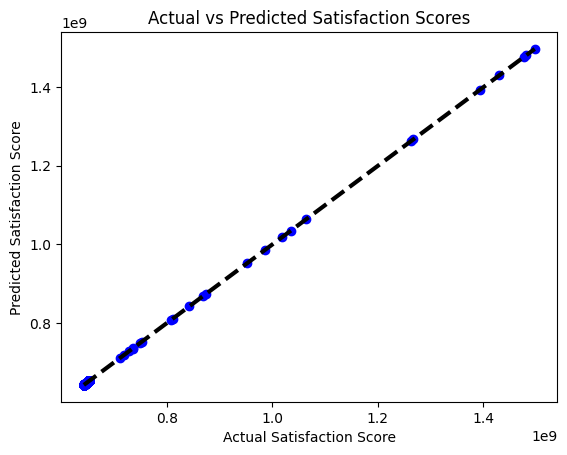

In [50]:
# Optionally, visualize the regression results
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Satisfaction Score')
plt.ylabel('Predicted Satisfaction Score')
plt.title('Actual vs Predicted Satisfaction Scores')
plt.show()

# Run a k-means (k=2) on the engagement & the experience score.

In [51]:
# K-means clustering on engagement & experience scores
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Engagement_Score', 'Experience_Score']])


In [53]:
df['Cluster']

0         0
1         0
2         0
3         0
4         0
         ..
149996    0
149997    0
149998    0
149999    0
150000    0
Name: Cluster, Length: 150001, dtype: int32

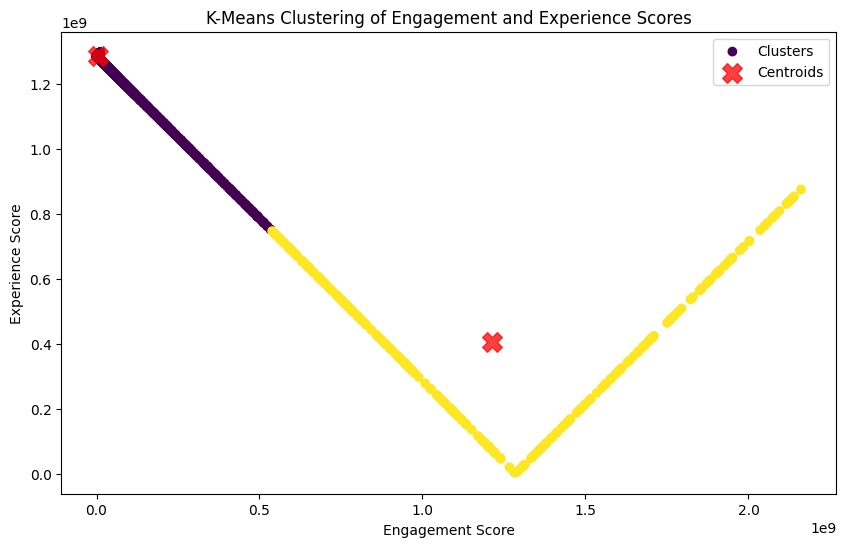

In [57]:
# Plot the clusters
plt.figure(figsize=(10, 6))

# Scatter plot of engagement and experience scores, colored by cluster
plt.scatter(df['Engagement_Score'], df['Experience_Score'], c=df['Cluster'], cmap='viridis', label='Clusters')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

# Add labels and title
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('K-Means Clustering of Engagement and Experience Scores')

# Display the legend
plt.legend()

# Show the plot
plt.show()

# Aggregate the average satisfaction & experience score per cluster. 

In [58]:
# Task 4.5 - Aggregate average satisfaction & experience score per cluster
cluster_avg = df.groupby('Cluster').agg({'Satisfaction_Score': 'mean', 'Experience_Score': 'mean'}).reset_index()
print("Average Satisfaction & Experience Score per Cluster:\n", cluster_avg)


Average Satisfaction & Experience Score per Cluster:
    Cluster  Satisfaction_Score  Experience_Score
0        0        6.458114e+08      1.286088e+09
1        1        8.103186e+08      4.065490e+08


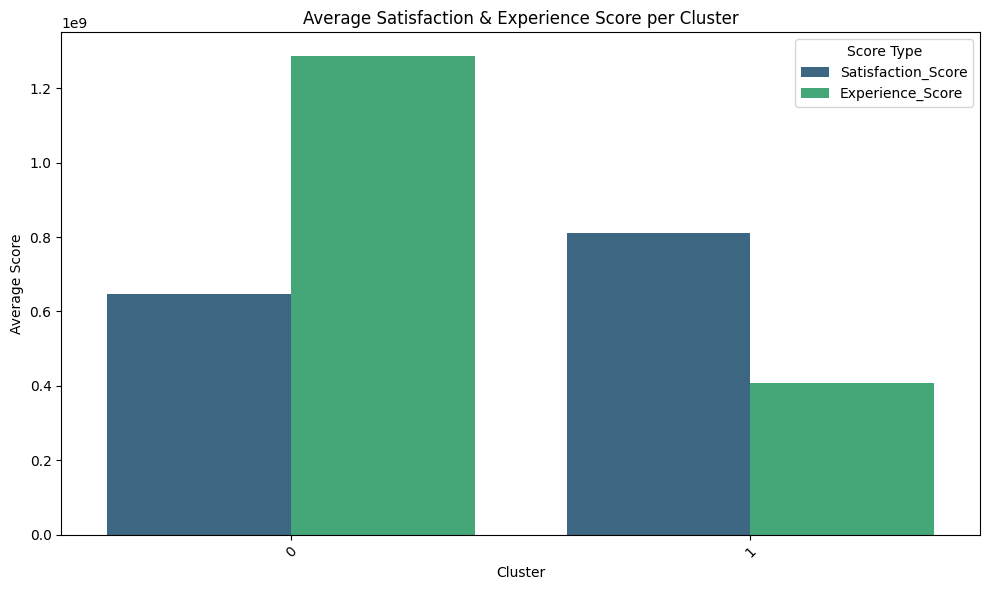

In [59]:
# Plotting
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(data=cluster_avg.melt(id_vars='Cluster', value_vars=['Satisfaction_Score', 'Experience_Score']),
            x='Cluster', y='value', hue='variable', palette='viridis')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Average Score')
plt.title('Average Satisfaction & Experience Score per Cluster')
plt.legend(title='Score Type')
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Show plot
plt.tight_layout()
plt.show()

In [60]:
import mlflow
import mlflow.sklearn

# Task 4.7 - Model tracking using MLFlow
mlflow.start_run()

# Log parameters and model
mlflow.log_param("model_type", "LinearRegression")
mlflow.sklearn.log_model(reg_model, "linear_regression_model")
mlflow.log_metric("train_score", reg_model.score(X_train, y_train))
mlflow.log_metric("test_score", reg_model.score(X_test, y_test))

mlflow.end_run()


ModuleNotFoundError: No module named 'mlflow'